In [1]:
# import sys
# !{sys.executable} -m pip install librosa
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import time
import collections
import pickle

In [22]:
# Read Data
data = pd.read_csv('speech_accent/speakers_all.csv')

data = data[data['file_missing?'] != True]
data = data[data['filename'] != 'nicaragua']
data = data[data['filename'] != 'sinhalese1']
data.head(10)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,NaN,NaN,NaN
33,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,False,NaN,NaN,NaN
34,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,False,NaN,NaN,NaN
35,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,False,NaN,NaN,NaN
36,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,False,NaN,NaN,NaN
37,25.0,15.0,"diekabo, ivory coast",agni1,agni,male,3,ivory coast,False,NaN,NaN,NaN
38,41.0,5.0,"accra, ghana",akan1,akan,male,979,ghana,False,NaN,NaN,NaN
39,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo,False,NaN,NaN,NaN
40,33.0,15.0,"tirana, albania",albanian2,albanian,male,5,albania,False,NaN,NaN,NaN
41,44.0,35.0,"tirana, albania",albanian3,albanian,male,458,albania,False,NaN,NaN,NaN


In [23]:
numOfTotal = data.shape[0]
data.shape

(2138, 12)

In [17]:
# find out how many unique countries in the dataset

# uniCountry = data['country'].unique().tolist()
# numOfCountry = len(uniCountry)
# numOfCountry

In [5]:
# uniCountry.index('ghana')

In [6]:
# convert country name to number 0 - 176

# countryCode = []
# for i in data['country']:
#     countryCode.append(uniCountry.index(i))

# len(countryCode)

In [24]:
# remove last 3 unknown columns
data = data.iloc[:,:-3]

# find out how many time each country appear in this dataset
country_freq = collections.Counter(data['country'])
frequency = []
for i in data['country']:
    frequency.append(country_freq[i])

data['frequency'] = frequency

# add column: file path
data['filePath'] = 'speech_accent/recordings/' + data['filename'] + '.wav'

data.head(10)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,frequency,filePath
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,9,speech_accent/recordings/afrikaans1.wav
33,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,False,9,speech_accent/recordings/afrikaans2.wav
34,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,False,9,speech_accent/recordings/afrikaans3.wav
35,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,False,9,speech_accent/recordings/afrikaans4.wav
36,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,False,9,speech_accent/recordings/afrikaans5.wav
37,25.0,15.0,"diekabo, ivory coast",agni1,agni,male,3,ivory coast,False,3,speech_accent/recordings/agni1.wav
38,41.0,5.0,"accra, ghana",akan1,akan,male,979,ghana,False,18,speech_accent/recordings/akan1.wav
39,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo,False,5,speech_accent/recordings/albanian1.wav
40,33.0,15.0,"tirana, albania",albanian2,albanian,male,5,albania,False,5,speech_accent/recordings/albanian2.wav
41,44.0,35.0,"tirana, albania",albanian3,albanian,male,458,albania,False,5,speech_accent/recordings/albanian3.wav


In [25]:
oldData = data

# remove rows that the country appears less than 3 time in this dataset.
data = data[data['frequency'] > 3]

# find out how many unique countries in the dataset
uniCountry = data['country'].unique().tolist()
numOfCountry = len(uniCountry)
print("number of unique countries:", numOfCountry)

# convert country name to number 0 - 108
countryCode = []
for i in data['country']:
    countryCode.append(uniCountry.index(i))

print(len(countryCode))
    
data['countryCode'] = countryCode

data.head()

number of unique countries: 108
2027


<ipython-input-25-dd58d1af9ad4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['countryCode'] = countryCode


,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,frequency,filePath,countryCode
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,9,speech_accent/recordings/afrikaans1.wav,0
33,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,False,9,speech_accent/recordings/afrikaans2.wav,0
34,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,False,9,speech_accent/recordings/afrikaans3.wav,0
35,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,False,9,speech_accent/recordings/afrikaans4.wav,0
36,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,False,9,speech_accent/recordings/afrikaans5.wav,0


In [26]:
data.shape

(2027, 12)

In [27]:
uniCountry

['south africa',
 'ghana',
 'kosovo',
 'albania',
 'morocco',
 'ethiopia',
 'saudi arabia',
 'egypt',
 'lebanon',
 'iraq',
 'kuwait',
 'united arab emirates',
 'israel',
 'usa',
 'algeria',
 'uk',
 'sudan',
 'armenia',
 'iran',
 'republic of georgia',
 'russia',
 'cameroon',
 'china',
 'mali',
 'senegal',
 'spain',
 'germany',
 'belarus',
 'bangladesh',
 'india',
 'bosnia and herzegovina',
 'bulgaria',
 'myanmar',
 'chile',
 'philippines',
 'croatia',
 'czech republic',
 'denmark',
 'afghanistan',
 'netherlands',
 'belgium',
 'south korea',
 'nigeria',
 'canada',
 'malaysia',
 'australia',
 'ireland',
 'jamaica',
 'fiji',
 'panama',
 'new zealand',
 'singapore',
 'bolivia',
 'switzerland',
 'italy',
 'pakistan',
 'estonia',
 'finland',
 'france',
 'democratic republic of congo',
 'portugal',
 'honduras',
 'austria',
 'greece',
 'kenya',
 'taiwan',
 'laos',
 'hungary',
 'romania',
 'indonesia',
 'japan',
 'kazakhstan',
 'cambodia',
 'angola',
 'tanzania',
 'sierra leone',
 'federated st

All .wav files, the min length (armenian6.wav) is 15 seconds, the max length (hungarian8.wav) is 1:46 minutes

In [28]:
# default duration = 2.97
duration_time = 11.88

# Example of a Siren spectrogram
y, sr = librosa.load('speech_accent/recordings/armenian6.wav', duration=duration_time) # can adjust duration, shape change
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 512)

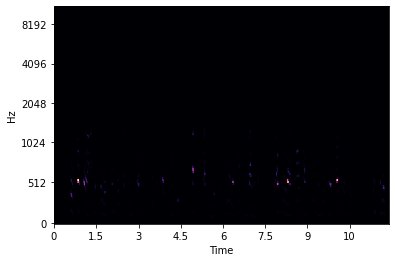

In [29]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [30]:
# how long the sound we use, determine by above duration_time, 2.97 = 128; 11.88 = 512
# replace all (128,128) to (128,length) which dynamically set up the network parameter. 
length = ps.shape[1]
# get the total sample size of new dataset (after removal)
numOfTotal = data.shape[0]

# get the total unique countries of new datset
uniCountry = data['country'].unique().tolist()
numOfCountry = len(uniCountry)

In [31]:
# subset of data, for testing (how many samples from dataset we use)
numOfSample = numOfTotal #1000
#numOfSample = 100
data = data[:numOfSample]
print("dataset dimension:",data.shape)
print("number of samples:", numOfSample)
print("number of countries:", numOfCountry)

dataset dimension: (2027, 12)
number of samples: 2027
number of countries: 108


In [14]:
D = [] # Dataset

start = time.time()

for row in data.itertuples():
    y, sr = librosa.load(row.filePath, duration=duration_time)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, length): continue
    D.append( (ps, row.countryCode) )

end = time.time()    

print("Number of samples: ", len(D))
print("time used for generating spectrogram:", end-start)

Number of samples:  2027
time used for generating spectrogram: 1133.9169583320618


In [32]:
# If you load spectrogram dataframe from file, no need to run above cell code

# open_file = open('spectrogram', "rb")
# D = pickle.load(open_file)
# open_file.close()

In [33]:
dataset = D

# radomize the dataset
random.shuffle(dataset)

numSplit = round(numOfSample * 0.8)

# split training set and testing set
train = dataset[:numSplit]
test = dataset[numSplit:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, length, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, length, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, numOfCountry))
y_test = np.array(keras.utils.to_categorical(y_test, numOfCountry))

In [34]:
# set up neural network: layer, number of neuron, activation function, etc.
model = Sequential()
input_shape=(128, length, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

# output layer, "numOfCountry" is 0-108 which represent which country been classified 
model.add(Dense(numOfCountry))
model.add(Activation('softmax'))

In [35]:
# start training time
start = time.time()

# build up the network and train
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

# use trainset to train the network
model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=1,
    validation_data= (X_test, y_test))

# end training time
end = time.time()

# use testset to test the network 
score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("time used for trainning:", end - start)

Epoch 1/12
1622/1622 [==============================] - 103s 64ms/step - loss: 4.5240 - accuracy: 0.1615 - val_loss: 4.2522 - val_accuracy: 0.2198
Epoch 2/12
1622/1622 [==============================] - 101s 62ms/step - loss: 4.1500 - accuracy: 0.1856 - val_loss: 4.0369 - val_accuracy: 0.2198
Epoch 3/12
1622/1622 [==============================] - 101s 62ms/step - loss: 4.0628 - accuracy: 0.1856 - val_loss: 4.1283 - val_accuracy: 0.2198
Epoch 4/12
1622/1622 [==============================] - 102s 63ms/step - loss: 4.0234 - accuracy: 0.1862 - val_loss: 3.9933 - val_accuracy: 0.2198
Epoch 5/12
1622/1622 [==============================] - 102s 63ms/step - loss: 3.9490 - accuracy: 0.1899 - val_loss: 4.0839 - val_accuracy: 0.2099
Epoch 6/12
1622/1622 [==============================] - 103s 64ms/step - loss: 3.8664 - accuracy: 0.1948 - val_loss: 4.3019 - val_accuracy: 0.2148
Epoch 7/12
1622/1622 [==============================] - 103s 63ms/step - loss: 3.8049 - accuracy: 0.2028 - val_loss: 4

In [18]:
model.save('myModel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: myModel\assets


In [19]:
myModel = reconstructed_model = keras.models.load_model("myModel")

In [20]:
data[data['countryCode'] == 2]
# import collections
# collections.Counter(countryCode)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,frequency,filePath,countryCode
39,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo,False,5,speech_accent/recordings/albanian1.wav,2
42,33.0,28.0,"mitrovice, kosovo",albanian4,albanian,male,868,kosovo,False,5,speech_accent/recordings/albanian4.wav,2
44,25.0,11.0,"prishtina, kosovo",albanian6,albanian,female,1081,kosovo,False,5,speech_accent/recordings/albanian6.wav,2
45,45.0,11.0,"prishtina, kosovo",albanian7,albanian,female,1403,kosovo,False,5,speech_accent/recordings/albanian7.wav,2
46,43.0,9.0,"prishtina, kosovo",albanian8,albanian,female,1404,kosovo,False,5,speech_accent/recordings/albanian8.wav,2


In [21]:
# save the converted spectrogram info dataframe into file
open_file = open('spectrogram', "wb")
pickle.dump(D, open_file)
open_file.close()

In [22]:
# load the spectrogram info datafram

# it actually just some big numerical arrays, librosa covert the spectrogram to some numerical info.

# open_file = open('spectrogram', "rb")
# loaded_spectrogram = pickle.load(open_file)
# open_file.close()